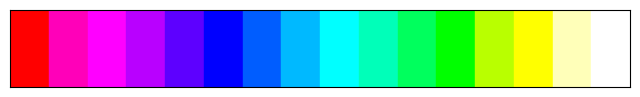

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

division = 16

data = """ 
    int8_t rainbowR[16] = {11, 11, 11,  8,  4,  0,  0,  0,  0,  0,  0,  0,  8, 11, 11, 11};
    int8_t rainbowG[16] = { 0,  0,  0,  0,  0,  0,  4,  8, 11, 11, 11, 11, 11, 11, 11, 11};
    int8_t rainbowB[16] = { 0,  8, 11, 11, 11, 11, 11, 11, 11,  8,  4,  0,  0,  0,  8, 11};
"""

# 正規表現を用いてデータを抽出
def extract_values(text, variable_name):
    match = re.search(rf"{variable_name}\[16\] = \{{(.*?)\}};", text)
    if match:
        return [int(x) for x in match.group(1).split(',')]
    return []

r_array = extract_values(data, "rainbowR")
g_array = extract_values(data, "rainbowG")
b_array = extract_values(data, "rainbowB")

def getColor(color_value):
    return r_array[color_value], g_array[color_value], b_array[color_value]

# 色の確認
fig, ax = plt.subplots(figsize=(8, 1))
for i in range(division):
    r, g, b = getColor(i)
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=[r/11, g/11, b/11]))

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, division)
ax.set_ylim(0, 1)
plt.show()